<center>
# How to calculate shear
</center>

***

In [1]:
# This cell prints today's date for reference. This comment can be deleted.
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 28 June, 2019


***
## Outline: 

The brightwind library allows for the shear exponent to be calculated for series of wind speed and direction measurements. The shear exponent can be calculated across the entirety of a time series or by direction sector. These shear exponents can then be applied to wind series data to calculate wind speeds at a specified scaled height. 

This tutorial will cover: 
1. How to calculate average shear across a timeseries.
1. How to calculate shear by direction sector across a timeseries.
1. How to scale a timeseries to a given height using the shear exponents calculated in Steps 1 and 2.
1. How to scale a timeseries to a specific height using a fixed shear value.
1. How to plot a 12 x 24 heat map to show the annual variation of shear.

***

### Step 1: Calculating average shear across a time series
The average shear exponent can be calculated across an entire timeseries using the <em>PowerLaw</em> functions in the brightwind library.

- First, upload the relevant data, defining the anemometers data and heights of these anemometers.

In [2]:
import brightwind as bw

# load data as dataframe
data = bw.load_csv(r'C:\...\brightwind\datasets\demo\demo_data.csv') 
# Specify columns in data which contain the anemometer measurements from which to calculate shear
anemometers = data[['Spd80mN','Spd60mN','Spd40mN']]

# Specify the heights of these anemometers
heights = [80,60,40]

- To calculate average shear from the data contained in <em> anemometers</em>, type the following:

In [3]:
Shear_by_power_law = bw.Shear.PowerLaw.calc_alpha(anemometers,heights,return_object=True)

- This function returns an object called <em> Shear_by_power_law </em> which contains lots of information about the calcualtion which was carried out. 

- To view what information is available, such as a plot and the average alpha value, type the following and press 'Tab':

<div style='margin-top: 3em; margin-bottom: 3em;'>
<center>
![image1](images/how_to_calculate_shear_1.png)
</center>
</div>

- To show the average alpha calculated, type: 

In [4]:
Shear_by_power_law.alpha

0.14343968482876332

- To show the plot, type:

C:\Users\lukec\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Gotham Rounded'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


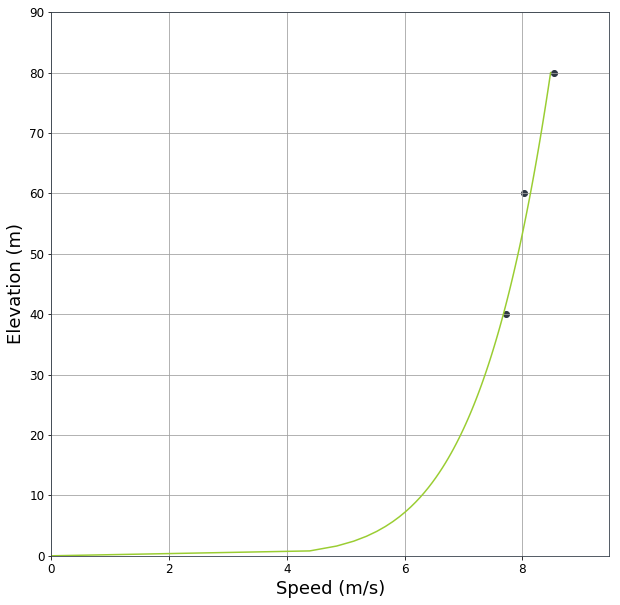

In [5]:
Shear_by_power_law.plot

***

### Step 2: Calculating average shear by direction
If you have direction measurements to accompany anemometer wind speed measurements, the shear can be calculated for specified direction sectors. 

- For example, load some directions measurements from the uploaded data:

In [6]:
direction = data['Dir78mS']

- Then, to calculate the shear for the default direction bins ( [345,15,45,75,105,135,165,195,225,255,285,315,345]), simply type:

In [7]:
Shear_by_sector = bw.Shear.BySector.calc_alpha(anemometers,heights,direction,return_object=True)

- Again, various information such as the alpha values and plot can be displayed from this object:

In [8]:
Shear_by_sector.alpha

Direction Bin
345.0-15.0     0.133835
15.0-45.0      0.137463
45.0-75.0      0.092085
75.0-105.0     0.044550
105.0-135.0    0.054472
135.0-165.0    0.125093
165.0-195.0    0.360030
195.0-225.0    0.190647
225.0-255.0    0.098324
255.0-285.0    0.061318
285.0-315.0    0.091071
315.0-345.0    0.111621
Name: Mean_Shear, dtype: float64

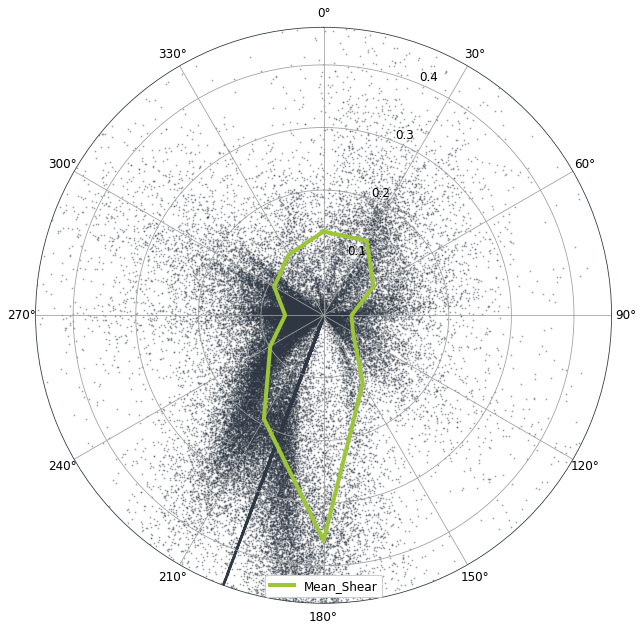

In [9]:
Shear_by_sector.plot


- The direction bins can be defined by the user for use in the BySector calculations. 
- These bins must begin at 0 and be listed as increasing.
- For example, to use the custom bins [0,30,60,90,120,150,180,210,240,270,300,330,360], simply type the following: 

In [16]:
custom_bins = [0,30,60,90,120,150,180,210,240,270,300,330,360]
Shear_by_sector_custom_bins = bw.Shear.BySector.calc_alpha(anemometers,heights,data['Dir78mS'], direction_bin_array=custom_bins, return_object=True)

In [17]:
Shear_by_sector_custom_bins.alpha

Direction Bin
0-30       0.150473
30-60      0.113948
60-90      0.071166
90-120     0.033553
120-150    0.073283
150-180    0.309143
180-210    0.227681
210-240    0.166148
240-270    0.067622
270-300    0.069433
300-330    0.112670
330-360    0.110403
Name: Mean_Shear, dtype: float64

***

### Step 3: Applying shear to timeseries data
Once the alpha values have been calculated, they can be applied to time series data to scale wind speeds from one height to another. 

- To scale wind speed data, i.e. data['Spd40mN'] from 40 m height to 80 m height using the average alpha value previously calculated, use the .apply_alpha function attached to the Shear_by_power_law object. Type:


In [12]:
Shear_by_power_law.apply_alpha(data['Spd40mN'], 40, 80)

,Unscaled_Wind_Speeds(40m),Scaled_Wind_Speeds(80m),Shear_Exponent
Timestamp,,,
2016-01-09 15:30:00,7.857,8.678335,0.14344
2016-01-09 15:40:00,7.952,8.783266,0.14344
2016-01-09 17:00:00,7.531,8.318256,0.14344
2016-01-09 17:10:00,6.252,6.905555,0.14344
2016-01-09 17:20:00,8.140,8.990918,0.14344
2016-01-09 17:30:00,8.330,9.200780,0.14344
2016-01-09 17:40:00,7.972,8.805356,0.14344
2016-01-09 17:50:00,7.649,8.448591,0.14344
2016-01-09 18:00:00,7.578,8.370169,0.14344



- To scale the same data, but using the alpha values calculated for each direction section use the .apply_alpha function attached to the Shear_by_sector object. Corresspongng wind direction measurements for the wind speeds to be scaled must also be passed to the function.

- Using <em>data['Dir38mS']</em> as the directions measurements, type:

In [13]:
Shear_by_sector.apply_alpha(data['Spd40mN'], 40, 80, data['Dir38mS'])

,Wind Direction,Unscaled_Wind_Speeds(40m),Scaled_Wind_Speeds(80m),Shear_Exponent
Timestamp,,,,
2016-01-09 15:30:00,112.20,7.857,8.159328,0.054472
2016-01-09 15:40:00,109.80,7.952,8.257983,0.054472
2016-01-09 17:00:00,111.80,7.531,7.820784,0.054472
2016-01-09 17:10:00,115.60,6.252,6.492569,0.054472
2016-01-09 17:20:00,113.60,8.140,8.453217,0.054472
2016-01-09 17:30:00,117.40,8.330,8.650528,0.054472
2016-01-09 17:40:00,115.90,7.972,8.278753,0.054472
2016-01-09 17:50:00,118.90,7.649,7.943324,0.054472
2016-01-09 18:00:00,111.40,7.578,7.869592,0.054472


### Step 4: Scale a timeseries using a fixed shear value

Timeseries data can also be scaled using a user defined value for shear. For example, to scale the wind speed measurements <em>data['Spd40mN']</em> from 40 m to 80 m, using a shear exponent of .2, type:


In [14]:
bw.Shear.scale(.2, data['Spd40mN'], 40, 80)

,Unscaled_Wind_Speeds(40m),Scaled_Wind_Speeds(80m),Shear_Exponent
Timestamp,,,
2016-01-09 15:30:00,7.857,9.025323,0.2
2016-01-09 15:40:00,7.952,9.134449,0.2
2016-01-09 17:00:00,7.531,8.650847,0.2
2016-01-09 17:10:00,6.252,7.181662,0.2
2016-01-09 17:20:00,8.140,9.350405,0.2
2016-01-09 17:30:00,8.330,9.568657,0.2
2016-01-09 17:40:00,7.972,9.157423,0.2
2016-01-09 17:50:00,7.649,8.786394,0.2
2016-01-09 18:00:00,7.578,8.704836,0.2


### Step 5: Plot a 12 x 24 shear 'heat' map

A plot can be created showing the variation of shear across the days and months of the year. To create this plot, pass the <em>'Shear_Exponent'</em> column of the data frame returned from previous calculation into the <em>Shear.dist_12x24 function</em>

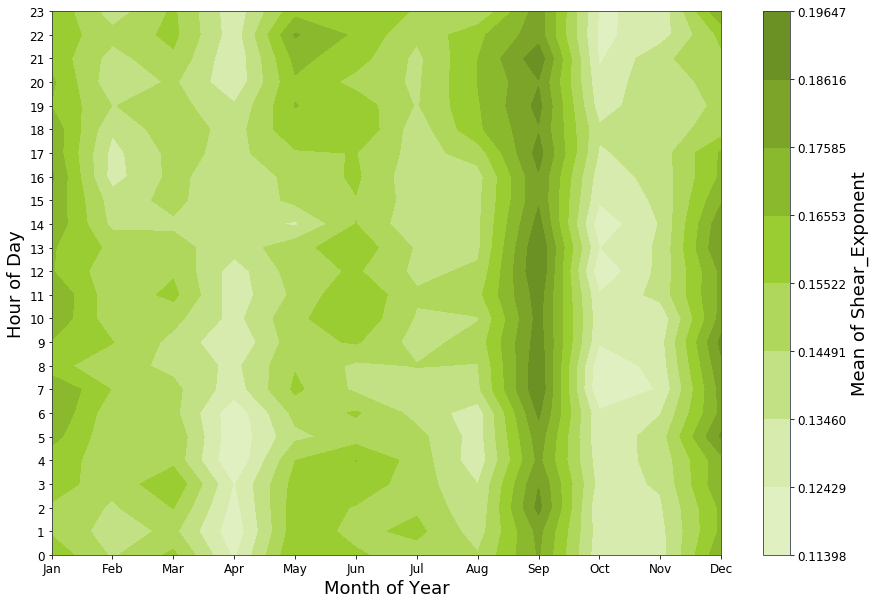

In [15]:
shear_data = Shear_by_sector.apply_alpha(data['Spd40mN'], 40, 80, data['Dir38mS'])
bw.Shear.dist_12x24(shear_data['Shear_Exponent'])